In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col=0)

In [3]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

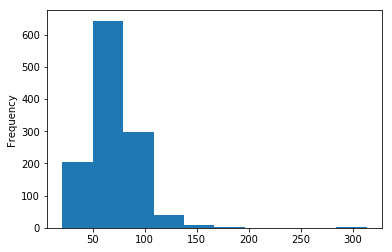

In [5]:
train['LotFrontage'].plot(kind='hist')

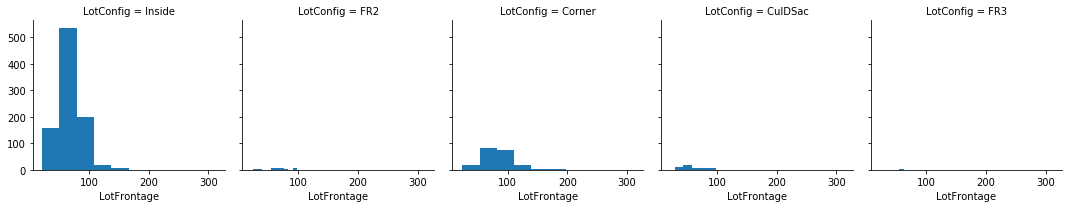

In [6]:
g = sns.FacetGrid(train, col='LotConfig', margin_titles=True)
g.map(plt.hist, "LotFrontage")

In [7]:
train[train['LotFrontage'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000


In [21]:
train['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [39]:
train_frontage = train[~train['LotFrontage'].isnull()][['LotFrontage', 'LotArea', 'LotConfig']]
train_missing = train[train['LotFrontage'].isnull()][['LotFrontage', 'LotArea', 'LotConfig']]
imputed_df = pd.DataFrame(columns=['LotFrontage', 'LotArea', 'LotConfig'])

for config in train['LotConfig'].unique()[:-1]:
    complete_subset = train_frontage[train_frontage['LotConfig'] == config]
    missing_subset = train_missing[train_missing['LotConfig'] == config]
    k = int(np.sqrt(complete_subset.shape[0] + missing_subset.shape[0]))
    clf = KNeighborsRegressor(k, weights='distance')
    trained_model = clf.fit(complete_subset['LotArea'].values.reshape(-1, 1), 
                            complete_subset['LotFrontage'])
    if missing_subset['LotArea'].values.reshape(-1, 1).shape[0] > 1:
        imputed_values = trained_model.predict(missing_subset['LotArea'].values.reshape(-1, 1))
        
    missing_subset['LotFrontage'] = imputed_values.reshape(-1)
    imputed_df = pd.concat([imputed_df,complete_subset,missing_subset])
imputed_df = imputed_df.sort_index()
imputed_df

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,LotFrontage,LotArea,LotConfig
1,65.000000,8450,Inside
2,80.000000,9600,FR2
3,68.000000,11250,Inside
4,60.000000,9550,Corner
5,84.000000,14260,FR2
6,85.000000,14115,Inside
7,75.000000,10084,Inside
8,86.887741,10382,Corner
9,51.000000,6120,Inside
10,50.000000,7420,Corner


In [ ]:
train['LotConfig'].unique()

In [ ]:
train.shape

In [ ]:
train['LotArea'].values

In [ ]:
imputed_df = pd.DataFrame(columns=['LotFrontage', 'LotArea', 'LotConfig'])
train_frontage = train[~train['LotFrontage'].isnull()][['LotFrontage', 'LotArea', 'LotConfig']]
imputed_df = imputed_df.append(train_frontage[train_frontage['LotConfig'] == 'Corner'])
imputed_df = imputed_df.append(train_frontage[train_frontage['LotConfig'] == 'Inside'])
imputed_df.sort_index()

In [ ]:
for x in LIST:
    values = train[x].unique()
train['ExterCond'] = train['ExterCond'].apply(lambda x: np.where(values == x)[0][0] + 1)
train['ExterCond']

In [ ]:
values = train['ExterCond'].unique()
np.where(values == 'Fa')[0][0]